## Import packages 

In [1]:
from utils.create_features_utils import *
import pandas as pd
import numpy as np
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

Using TensorFlow backend.


## Read match data with features

In [42]:
df = pd.read_csv('data/wimbledon_matches_with_feature.csv')

df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

## List of features

In [43]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

## Split Data intro Train (80 %) and Test (20%)

In [44]:
target = df.outcome
features = df[features_list]

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.20, random_state=1)

## Build the neural network. 
### Deatils
    - Number of Layers: 3. (2 Hidden Layers)
    - Number of Neuros in each layer: 64->32->1
    - Activation relu->relu->sigmoid
    - Stop if validation loss does not improve for 500 epochs
    - Save the best model which gives the maximum validation accuracy. 

In [45]:
network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(features.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=500)
mc = ModelCheckpoint('data/best_model.h5', monitor='val_loss', mode='min', verbose=2, save_best_only=True)

history = network.fit(train_features, train_target, 
            epochs=1000, verbose=0, batch_size=128, 
            validation_data=(test_features, test_target), callbacks=[es, mc]) 

saved_model = load_model('data/best_model.h5')


Epoch 00001: val_loss improved from inf to 4.25234, saving model to data/best_model.h5

Epoch 00002: val_loss improved from 4.25234 to 0.61772, saving model to data/best_model.h5

Epoch 00003: val_loss did not improve from 0.61772

Epoch 00004: val_loss did not improve from 0.61772

Epoch 00005: val_loss did not improve from 0.61772

Epoch 00006: val_loss improved from 0.61772 to 0.59556, saving model to data/best_model.h5

Epoch 00007: val_loss did not improve from 0.59556

Epoch 00008: val_loss improved from 0.59556 to 0.56623, saving model to data/best_model.h5

Epoch 00009: val_loss did not improve from 0.56623

Epoch 00010: val_loss improved from 0.56623 to 0.56397, saving model to data/best_model.h5

Epoch 00011: val_loss did not improve from 0.56397

Epoch 00012: val_loss improved from 0.56397 to 0.55723, saving model to data/best_model.h5

Epoch 00013: val_loss did not improve from 0.55723

Epoch 00014: val_loss improved from 0.55723 to 0.55266, saving model to data/best_model


Epoch 00133: val_loss did not improve from 0.48968

Epoch 00134: val_loss did not improve from 0.48968

Epoch 00135: val_loss did not improve from 0.48968

Epoch 00136: val_loss did not improve from 0.48968

Epoch 00137: val_loss did not improve from 0.48968

Epoch 00138: val_loss did not improve from 0.48968

Epoch 00139: val_loss did not improve from 0.48968

Epoch 00140: val_loss improved from 0.48968 to 0.48756, saving model to data/best_model.h5

Epoch 00141: val_loss improved from 0.48756 to 0.48609, saving model to data/best_model.h5

Epoch 00142: val_loss did not improve from 0.48609

Epoch 00143: val_loss did not improve from 0.48609

Epoch 00144: val_loss did not improve from 0.48609

Epoch 00145: val_loss did not improve from 0.48609

Epoch 00146: val_loss did not improve from 0.48609

Epoch 00147: val_loss did not improve from 0.48609

Epoch 00148: val_loss did not improve from 0.48609

Epoch 00149: val_loss did not improve from 0.48609

Epoch 00150: val_loss did not impro


Epoch 00311: val_loss did not improve from 0.48609

Epoch 00312: val_loss did not improve from 0.48609

Epoch 00313: val_loss did not improve from 0.48609

Epoch 00314: val_loss did not improve from 0.48609

Epoch 00315: val_loss did not improve from 0.48609

Epoch 00316: val_loss did not improve from 0.48609

Epoch 00317: val_loss did not improve from 0.48609

Epoch 00318: val_loss did not improve from 0.48609

Epoch 00319: val_loss did not improve from 0.48609

Epoch 00320: val_loss did not improve from 0.48609

Epoch 00321: val_loss did not improve from 0.48609

Epoch 00322: val_loss did not improve from 0.48609

Epoch 00323: val_loss did not improve from 0.48609

Epoch 00324: val_loss did not improve from 0.48609

Epoch 00325: val_loss did not improve from 0.48609

Epoch 00326: val_loss did not improve from 0.48609

Epoch 00327: val_loss did not improve from 0.48609

Epoch 00328: val_loss did not improve from 0.48609

Epoch 00329: val_loss did not improve from 0.48609

Epoch 00330


Epoch 00476: val_loss did not improve from 0.48609

Epoch 00477: val_loss did not improve from 0.48609

Epoch 00478: val_loss did not improve from 0.48609

Epoch 00479: val_loss did not improve from 0.48609

Epoch 00480: val_loss did not improve from 0.48609

Epoch 00481: val_loss did not improve from 0.48609

Epoch 00482: val_loss did not improve from 0.48609

Epoch 00483: val_loss did not improve from 0.48609

Epoch 00484: val_loss did not improve from 0.48609

Epoch 00485: val_loss did not improve from 0.48609

Epoch 00486: val_loss did not improve from 0.48609

Epoch 00487: val_loss did not improve from 0.48609

Epoch 00488: val_loss did not improve from 0.48609

Epoch 00489: val_loss did not improve from 0.48609

Epoch 00490: val_loss did not improve from 0.48609

Epoch 00491: val_loss did not improve from 0.48609

Epoch 00492: val_loss did not improve from 0.48609

Epoch 00493: val_loss did not improve from 0.48609

Epoch 00494: val_loss did not improve from 0.48609

Epoch 00495


Epoch 00638: val_loss did not improve from 0.48609

Epoch 00639: val_loss did not improve from 0.48609

Epoch 00640: val_loss did not improve from 0.48609

Epoch 00641: val_loss did not improve from 0.48609


## Accuracy of the best model

In [46]:
_, train_acc = saved_model.evaluate(train_features, train_target, verbose=0)
_, test_acc = saved_model.evaluate(test_features, test_target, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.772, Test Accuracy: 0.759


## Graph showing train/test loss and accuracy

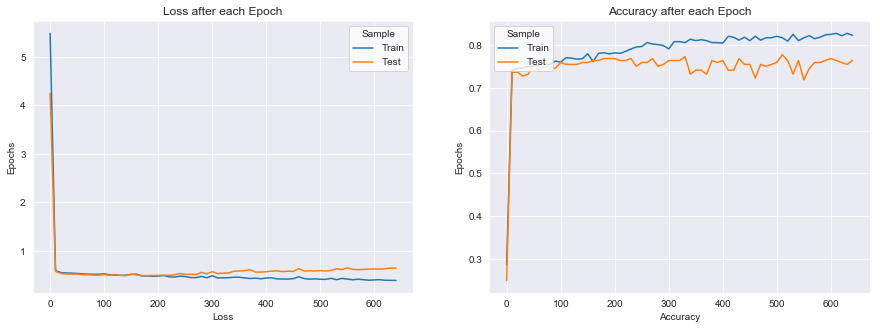

In [47]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Loss')
plt.ylabel('Epochs')

plt.subplot(1, 2, 2)
plt.title('Accuracy after each Epoch')
plt.plot(history.epoch[::10], history.history['acc'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_acc'][::10], label='Test')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left', title='Sample', facecolor='white', fancybox=True)


plt.savefig('data/results/loss_acc.jpg', quality=100)

## Test Data classification report and confusion matrix

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_target, saved_model.predict_classes(test_features)))
print(confusion_matrix(test_target, saved_model.predict_classes(test_features)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       165
           1       0.55      0.20      0.29        55

   micro avg       0.76      0.76      0.76       220
   macro avg       0.67      0.57      0.57       220
weighted avg       0.72      0.76      0.71       220

[[156   9]
 [ 44  11]]


## Test Data classification report and confusion matrix

In [49]:
print(classification_report(train_target, saved_model.predict_classes(train_features)))
print(confusion_matrix(train_target, saved_model.predict_classes(train_features)))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       627
           1       0.75      0.31      0.44       252

   micro avg       0.77      0.77      0.77       879
   macro avg       0.76      0.63      0.65       879
weighted avg       0.77      0.77      0.74       879

[[602  25]
 [175  77]]


## 2019 Wimbledon Matches

In [50]:
df_2019 = pd.read_csv('data/wimbledon_2019.csv')
df_raw = pd.read_csv('data/mens/combined_raw_data.csv')

df_2019['Date'] = '2019/07/07'
df_2019['Surface'] = 'Grass'
df_2019['diff_rank'] = df_2019['player_0_rank'] - df_2019['player_1_rank']

/Users/jugalmarfatia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Creating features to make prediction

In [51]:
df_2019 = create_features(df_2019, df_raw)

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


## Model Predictions
    - Outcome 0 indicates player_0 will win and outcome 1 indicates player_1 will win

In [52]:
features_16 = df_2019[features_list]

df_2019['prediction'] = saved_model.predict_classes(features_16)
df_2019['probability'] = 1 - np.abs(df_2019.prediction - saved_model.predict_proba(features_16).flatten())

df_2019[['Round', 'player_0', 'player_1', 'prediction', 'probability']]

,Round,player_0,player_1,prediction,probability
0,Round of 16,Djokovic N.,Humbert U.,0,0.887655
1,Round of 16,Goffin D.,Verdasco F.,0,0.557724
2,Round of 16,Raonic M.,Pella G.,0,0.850343
3,Round of 16,Bautista Agut R.,Paire B.,0,0.806741
4,Round of 16,Querrey S.,Sandgren T.,0,0.818642
5,Round of 16,Nadal R.,Sousa J.,0,0.899063
6,Round of 16,Nishikori K.,Kukushkin M.,0,0.846639
7,Round of 16,Federer R.,Berrettini M.,0,0.860115
8,Quarter,Djokovic N.,Goffin D.,0,0.838845
9,Quarter,Raonic M.,Bautista Agut R.,1,0.909341
